# 2. EDA: Exploracion de los datos
En esta seccion, examinamos la composicion de las variables y algunas de sus relaciones. Lo hacemos en dos partes. Primero, nos concentramos en el subconjunto de datos alimenta nuestras consultas (con excepcion de sistema de recomendacion). Segundo, terminamos con en subconjunto de datos que alimenta nuestro modelo ML.

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_mvp_funciones = pd.read_csv(os.path.join('3_output','data_mvp_final_funciones.csv'),index_col=0).convert_dtypes()
data_mvp_exitodir = pd.read_csv(os.path.join('3_output','data_mvp_final_funciones_exitodir.csv'),index_col=0).convert_dtypes()
data_mvp_ml = pd.read_csv(os.path.join('3_output','data_mvp_final_ml.csv'),index_col=0).convert_dtypes()

## 5.1 EDA: Subconjunto de datos que alimenta las funciones

In [5]:
# el primer subconjunto de datos: funciones
data_mvp_funciones.info()
data_mvp_funciones.head(2)

<class 'pandas.core.frame.DataFrame'>
Index: 59545 entries, 0 to 310039
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pelicula_id        59545 non-null  Int64  
 1   title              59545 non-null  string 
 2   original_language  59545 non-null  string 
 3   runtime            59545 non-null  Int64  
 4   release_date       59545 non-null  string 
 5   franquicia         59545 non-null  string 
 6   budget             59545 non-null  Int64  
 7   revenue            59545 non-null  Int64  
 8   pais_name          59545 non-null  string 
 9   productora         59545 non-null  string 
 10  director           59545 non-null  string 
 11  return             59545 non-null  Float64
 12  release_year       59545 non-null  Int64  
dtypes: Float64(1), Int64(5), string(7)
memory usage: 6.7 MB


,pelicula_id,title,original_language,runtime,release_date,franquicia,budget,revenue,pais_name,productora,director,return,release_year
0,862,Toy Story,en,81,1995-10-30,Toy Story Collection,30000000,373554033,United States of America,Pixar Animation Studios,John Lasseter,12.451801,1995
12,8844,Jumanji,en,104,1995-12-15,Sin franquicia,65000000,262797249,desconocido,desconocido,Joe Johnston,4.043035,1995


 Primero clasificamos las variables en dos grupos:
- cualitativas categoricas
- cuantitativas (numericas)

Nuestra primary key es `pelicula_id`; por tanto, esta no la clasificamos.

Las variables `release_date` y `release_year` son redundantes; por este motivo, excluimos `release_date` del EDA.

In [52]:
# variables cualitativas categoricas
vars_cat=[
    'title',
    'original_language',
    'franquicia',
    'pais_name',
    'productora',
    'director']

# cuantitativas (numericas)
vars_num=[
    'runtime',
    'budget',
    'revenue',
    'return',
    'release_year' # consideramos año como una variable numerica, para facilitar la evaluacion de anomalias.
    ]

data_mvp_funciones_ord=data_mvp_funciones.loc[:,['pelicula_id']+vars_ord].drop_duplicates()
data_mvp_funciones_num=data_mvp_funciones.loc[:,['pelicula_id']+vars_num].drop_duplicates()

### 4.1.1. Outliers en variables numericas

In [53]:
data_mvp_funciones_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54072 entries, 0 to 310039
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   pelicula_id   54072 non-null  Int64  
 1   pais_name     54072 non-null  string 
 2   productora    54072 non-null  string 
 3   runtime       54072 non-null  Int64  
 4   budget        54072 non-null  Int64  
 5   revenue       54072 non-null  Int64  
 6   return        54072 non-null  Float64
 7   release_year  54072 non-null  Int64  
dtypes: Float64(1), Int64(5), string(2)
memory usage: 4.0 MB


In [54]:
# no observamos anomalias en la columna de año; vale la pena aclarar, que el cine de invento a principios del XIX
print(data_mvp_funciones_num[['release_year']].min())
print(data_mvp_funciones_num[['release_year']].max())

release_year    1874
dtype: int64
release_year    2020
dtype: int64


In [55]:
print(data_mvp_funciones_num[['runtime']].min())
print(data_mvp_funciones_num[['runtime']].max())

runtime    0
dtype: int64
runtime    1256
dtype: int64


In [56]:
data_mvp_funciones_num['runtime'].loc[data_mvp_funciones_num['runtime']==0] = data_mvp_funciones_num['runtime'].median()
print(data_mvp_funciones_num[['runtime']].min())
print(data_mvp_funciones_num[['runtime']].max())

In [59]:
def outliers_zscore(x):
    z_score = np.abs((x - np.mean(x)) / np.std(x))
    return z_score > 3

In [60]:
data_mvp_funciones_num[['runtime_outlier']]=data_mvp_funciones_num.groupby(['release_year'])[['runtime']].transform(outliers_zscore)
data_mvp_funciones_num[['release_year','runtime']].loc[data_mvp_funciones_num['runtime_outlier']==1]

,release_year,runtime
138,1995,192
3759,1993,195
6100,1939,238
6204,1956,201
7107,2013,6
...,...,...
309678,2017,6
309747,1971,8
309969,1988,270
309996,2017,4


In [61]:
data_mvp_funciones_num[['release_year','runtime']].loc[data_mvp_funciones_num['runtime_outlier']==1].value_counts()

release_year  runtime
1999          240        20
1997          190        12
1987          230         9
2014          11          6
2012          7           6
                         ..
1982          5           1
              6           1
              7           1
              205         1
2018          105         1
Name: count, Length: 622, dtype: int64

In [62]:
outlier_runtime_index=data_mvp_funciones_num[['release_year','runtime']].loc[data_mvp_funciones_num['runtime_outlier']==1].value_counts()[
    data_mvp_funciones_num[['release_year','runtime']].loc[data_mvp_funciones_num['runtime_outlier']==1].value_counts()==1].index

data_mvp_funciones_num=data_mvp_funciones_num.loc[~data_mvp_funciones_num.index.isin(outlier_runtime_index)]

### 4.1.1. Peliculas exitosas

En esta seccion, exploramos los datos relacionados con las peliculas. Una de consultas esta relacionadas con el exito del director medido por medio la relación entre ingresos y costos de producccion. Pero, ¿qué tan existosos son los directores segun nuestra base de datos? Es decir, ¿qué resultados esperamos encontrar cuando realicemos las consultas a traves del API?

In [63]:
# nos concentramos en la rentabilidad de las peliculas
data_mvp_funciones_num_plot=data_mvp_funciones_num[['pelicula_id','budget','revenue',]].loc[
    data_mvp_funciones_num['return']!=0].drop_duplicates()

# como los datos esta en precios corrientes que estan sujetos a cambios por inflacion
# un grafico de dispersion estaria altamente sesgado en favor de las peliculas mas recientes
# debido a cambios por inflacion adicionales a los cambios en el tamano de las producciones.
# para reducir los efectos de las inflacion en nuestra visualizacion, reportamos


# sumamos 1 a todas las para garantizar que el log natural no sea negativo.
data_mvp_funciones_num_plot[['budget_log']] = 1 + np.log(data_mvp_funciones_num_plot[['budget']])
data_mvp_funciones_num_plot[['revenue_log']] = 1 + np.log(data_mvp_funciones_num_plot[['revenue']])

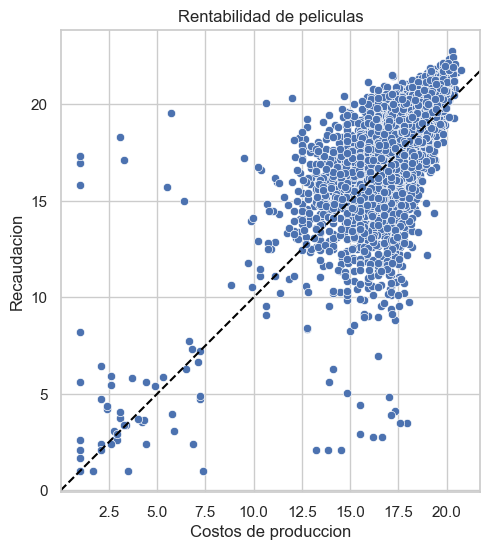

In [64]:
# definimos tamaño
plt.figure(figsize=(6, 6))
sns.scatterplot(data=data_mvp_funciones_num_plot, x='budget_log', y='revenue_log')
plt.axline((1, 1), slope=1,linestyle='dashed', color='black')
plt.title("Rentabilidad de peliculas")
plt.xlabel("Costos de produccion")
plt.ylabel("Recaudacion")
plt.gca().set_aspect('equal')

### 4.1.2. Ranking de paises por produccion

In [79]:
data_mvp_funciones_num_plot2=data_mvp_funciones_num[['pelicula_id']].drop_duplicates()
data_mvp_pais_2join=data_mvp_funciones.loc[:,['pelicula_id','pais_name']].drop_duplicates()
data_mvp_funciones_num_plot2=data_mvp_funciones_num_plot2.merge(data_mvp_pais_2join,on=['pelicula_id'])
data_mvp_pais_rank = data_mvp_funciones_num_plot2.groupby('pais_name')['pelicula_id'].count().reset_index()
data_mvp_pais_rank.columns = ['pais', 'cantidad_peliculas']
data_mvp_pais_rank = data_mvp_pais_rank.sort_values(by='cantidad_peliculas', ascending=False)
data_mvp_pais_rank.head()

,pais,cantidad_peliculas
69,desconocido,41105
68,United States of America,2570
29,Japan,413
67,United Kingdom,370
17,France,256


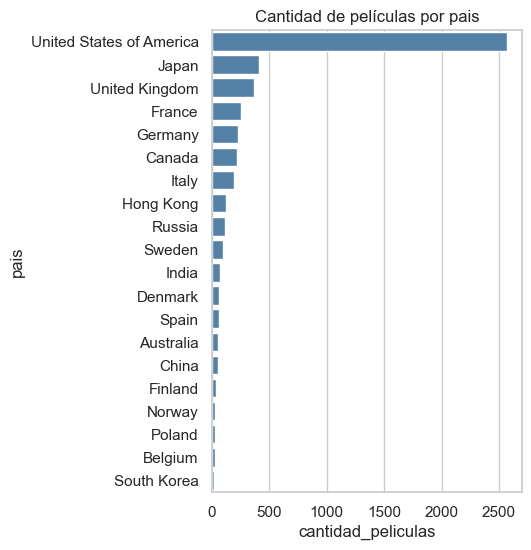

In [75]:
data_mvp_pais_rank=data_mvp_pais_rank.loc[data_mvp_pais_rank['pais']!='desconocido']

# definimos estilo de plot
sns.set(style="whitegrid")
# seleccionamos los 10 directores con más cantidad de películas
df_pais = data_mvp_pais_rank.nlargest(20, 'cantidad_peliculas')
# definimos tamaño
plt.figure(figsize=(4, 6))
# creamos el gráfico
ax = sns.barplot(
    y='pais',
    x='cantidad_peliculas',
    data=df_pais,
    color='steelblue',
    orient='h')
# añadimos título
plt.title('Cantidad de películas por pais')
# mostramos el gráfico
plt.show()

### 4.1.3. Directores exitosos

En esta seccion, exploramos los datos relacionados con los directores. Una de consultas esta relacionadas con el exito del director medido por medio la relación entre ingresos y costos de producccion. Pero, que tan existosos son los directores en nuestros datos? Es decir, el usuario que espera encontrar cuando realizar las consultas  

In [16]:
data_mvp_exitodir.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18614 entries, 0 to 18613
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   director          18614 non-null  string 
 1   director_revenue  18614 non-null  Int64  
 2   director_budget   18614 non-null  Int64  
 3   director_return   18614 non-null  Float64
 4   pelicula_id       18614 non-null  Int64  
 5   title             18614 non-null  string 
 6   release_date      18614 non-null  string 
 7   release_year      18614 non-null  Int64  
 8   budget            18614 non-null  Int64  
 9   revenue           18614 non-null  Int64  
 10  return            18614 non-null  Float64
dtypes: Float64(2), Int64(6), string(3)
memory usage: 1.8 MB


#### 4.1.3.1 Anomalias en los datos

In [17]:
data_mvp_exitodir[['director_return_outlier']]=data_mvp_exitodir[['director_return']].transform(outliers_zscore)
index_exitodir_return=data_mvp_exitodir[['director','director_budget','director_revenue','director_return']].loc[data_mvp_exitodir['director_return_outlier']==1].index
data_mvp_exitodir[['director','director_budget','director_revenue','director_return']].loc[data_mvp_exitodir['director_return_outlier']==1].drop_duplicates()

,director,director_budget,director_revenue,director_return
8695,Marek Kanievska,1,12396383,12396383.0
10470,Park Kwang-hyun,8,33579813,4197476.625
10505,Patricia Martínez de Velasco,1,2755584,2755584.0


In [18]:
data_mvp_exitodir=data_mvp_exitodir.loc[~data_mvp_exitodir.index.isin(index_exitodir_return)]

<class 'pandas.core.frame.DataFrame'>
Index: 18608 entries, 0 to 18613
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   director                 18608 non-null  string 
 1   director_revenue         18608 non-null  Int64  
 2   director_budget          18608 non-null  Int64  
 3   director_return          18608 non-null  Float64
 4   pelicula_id              18608 non-null  Int64  
 5   title                    18608 non-null  string 
 6   release_date             18608 non-null  string 
 7   release_year             18608 non-null  Int64  
 8   budget                   18608 non-null  Int64  
 9   revenue                  18608 non-null  Int64  
 10  return                   18608 non-null  Float64
 11  director_return_outlier  18608 non-null  boolean
dtypes: Float64(2), Int64(6), boolean(1), string(3)
memory usage: 1.9 MB


#### 4.1.3.1 Exploracion de datos: Visualizaciones

In [76]:
#
data_mvp_exitodir_plot=data_mvp_exitodir[
    ['director','director_budget','director_revenue']].drop_duplicates()
data_mvp_exitodir_plot[['director_budget_log']]=np.log(data_mvp_exitodir_plot[['director_budget']])+1
data_mvp_exitodir_plot[['director_revenue_log']]=np.log(data_mvp_exitodir_plot[['director_revenue']])+1

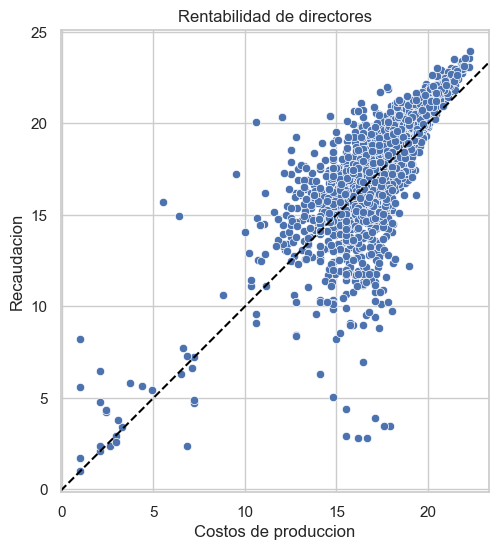

In [77]:
# definimos tamaño
plt.figure(figsize=(6, 6))
sns.scatterplot(data=data_mvp_exitodir_plot, x='director_budget_log', y='director_revenue_log')
min_limit=min(data_mvp_exitodir_plot[['director_budget']].min())
max_limit=min(data_mvp_exitodir_plot[['director_revenue']].max())
plt.axline((1, 1), slope=1,linestyle='dashed', color='black')
plt.title("Rentabilidad de directores")
plt.xlabel("Costos de produccion")
plt.ylabel("Recaudacion")
plt.gca().set_aspect('equal')

In [21]:
data_mvp_exitodir_plot2=data_mvp_exitodir[['director','pelicula_id']].drop_duplicates()
data_mvp_exitodir_rank = data_mvp_exitodir_plot2.groupby('director')['pelicula_id'].count().reset_index()
data_mvp_exitodir_rank.columns = ['director', 'cantidad_peliculas']
data_mvp_exitodir_rank = data_mvp_exitodir_rank.sort_values(by='cantidad_peliculas', ascending=False)
data_mvp_exitodir_rank.head()

,director,cantidad_peliculas
2609,desconocido,3065
1185,John Ford,68
1651,Michael Curtiz,65
84,Alfred Hitchcock,53
2579,Woody Allen,49


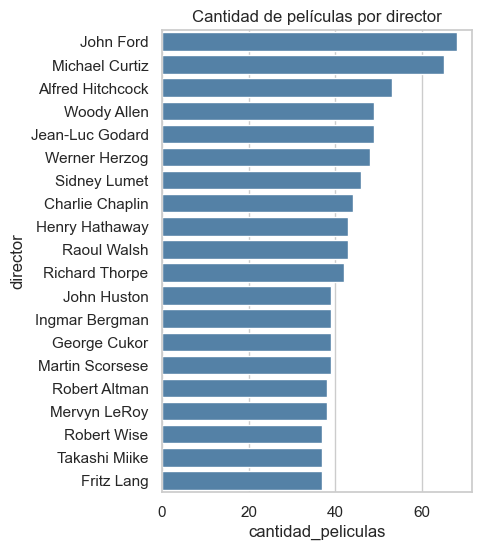

In [41]:
data_mvp_exitodir_rank=data_mvp_exitodir_rank.loc[data_mvp_exitodir_rank['director']!='desconocido']

# definimos estilo de plot
sns.set(style="whitegrid")

# seleccionamos los 10 directores con más cantidad de películas
df_rank = data_mvp_exitodir_rank.nlargest(20, 'cantidad_peliculas')

# definimos tamaño
plt.figure(figsize=(4, 6))

# creamos el gráfico
ax = sns.barplot(
    y='director',
    x='cantidad_peliculas',
    data=df_rank,
    color='steelblue',
    orient='h')

# añadimos título
plt.title('Cantidad de películas por director')

# mostramos el gráfico
plt.show()

## 5.2 EDA: Subconjunto de datos que alimenta el modelo ML

In [4]:
# el segundo subconjunto de datos: modelo ml
data_mvp_ml.info()
data_mvp_ml.head(2)

<class 'pandas.core.frame.DataFrame'>
Index: 109186 entries, 0 to 310039
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   pelicula_id           109186 non-null  Int64  
 1   title                 109186 non-null  string 
 2   popularity            109186 non-null  Float64
 3   vote_average          109186 non-null  Float64
 4   release_year          109186 non-null  Int64  
 5   franquicia            109186 non-null  string 
 6   original_language     109186 non-null  string 
 7   prtgnst_name          109186 non-null  string 
 8   prtgnst_gender_strng  109186 non-null  string 
 9   prtgnst_nivel         109186 non-null  string 
 10  director              109186 non-null  string 
 11  executive_producer    109186 non-null  string 
dtypes: Float64(2), Int64(2), string(8)
memory usage: 11.2 MB


,pelicula_id,title,popularity,vote_average,release_year,franquicia,original_language,prtgnst_name,prtgnst_gender_strng,prtgnst_nivel,director,executive_producer
0,862,Toy Story,21.946943,7.7,1995,Toy Story Collection,en,Tom Hanks,hombre,1,John Lasseter,Ed Catmull
1,862,Toy Story,21.946943,7.7,1995,Toy Story Collection,en,Tom Hanks,hombre,1,John Lasseter,Steve Jobs
